# Intro
Name:  

    LeBlanc_2015_paper_file_restore

Purpose:  

    Laod the cloud property retrieval data from the paper, for saving into a shareable format with Kokhanovsky
  
Input:

    none at command line
  
Output:

    ict file save
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - plotting_utils (user defined plotting routines)
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - retrieved_kisq_20120525_v9.out  retrieved_kisq_20120806_v9.out  retrieved_kisq_20130110_v9.out
  
 Modification History:
 
     Written: by Samuel LeBlanc, Santa Cruz, 2019-11-29

# Import modules

In [1]:
import numpy as np
import hdf5storage as hs
import os
import write_utils as wu
import scipy.io as sio
from path_utils import getpath
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [42]:
from Sp_parameters import smooth
from load_utils import load_from_json, mat2py_time,toutc
import write_utils as wu

In [3]:
name = 'SSFR3'

In [4]:
vv = 'v9'

In [102]:
fp = getpath('SSFR3')
fp_dat = getpath('SSFR3')+'data/'

Return path named:  SSFR3 /mnt/c/Users/lebla/Research/SSFR3/
Return path named:  SSFR3 /mnt/c/Users/lebla/Research/SSFR3/


# Load the files

In [7]:
days = ['20120525','20120806','20130110']
labels = ['Liquid','Mixed-phase','Ice']

In [25]:
times = [[15.0,16.0],[22.0,23.0],[17.5,19.5]]

## Load the 15 parameters retrievals

In [31]:
f_liq = sio.idl.readsav(fp_dat+'retrieved_kisq_{d}_{v}.out'.format(d=days[0],v=vv))
f_mix = sio.idl.readsav(fp_dat+'retrieved_kisq_{d}_{v}.out'.format(d=days[1],v=vv))
f_ice = sio.idl.readsav(fp_dat+'retrieved_kisq_{d}_{v}.out'.format(d=days[2],v=vv))

In [32]:
f_liq.keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

## Load the slope retrievals

In [10]:
sl_liq = sio.idl.readsav(fp_dat+'{d}_cld_parms3_1600nm.out'.format(d=days[0]))
sl_mix = sio.idl.readsav(fp_dat+'{d}_cld_parms3_1600nm.out'.format(d=days[1]))
sl_ice = sio.idl.readsav(fp_dat+'{d}_cld_parms3_ic_1600nm.out'.format(d=days[2]))

In [11]:
sl_liq.keys()

['tau', 'etau', 'eref', 'ref', 'tmhrs']

## Load the 2wvl retrievals

In [13]:
twv_liq = sio.idl.readsav(fp_dat+'{d}_cld_parms3_2wvl_1600nm.out'.format(d=days[0]))
twv_mix = sio.idl.readsav(fp_dat+'{d}_cld_parms3_2wvl_1600nm.out'.format(d=days[1]))
twv_ice = sio.idl.readsav(fp_dat+'{d}_cld_parms3_ic_2wvl_1600nm.out'.format(d=days[2]))

In [14]:
twv_liq.keys()

['tau', 'etau', 'eref', 'ref', 'tmhrs']

## Load the spectra

In [23]:
sp_liq = sio.idl.readsav(fp_dat+'{d}_calibspcs.out'.format(d=days[0],v=vv))
sp_mix = sio.idl.readsav(fp_dat+'{d}_calibspcs.out'.format(d=days[1],v=vv))
sp_ice = sio.idl.readsav(fp_dat+'{d}_calibspcs.out'.format(d=days[2],v=vv))

In [24]:
sp_liq.keys()

['status',
 'darks',
 'zenlambda',
 'zer',
 'nadlambda',
 'nspectra',
 'zspectra',
 'sat',
 'ner',
 'tmhrs']

In [26]:
sp_liq['zspectra'].shape

(53096, 393)

In [28]:
sp_liq['tmhrs'].shape

(53096,)

In [29]:
sp_liq['status']

array(['Measurement date    : 2012 05 25',
       'Processing date     : 2012 11 06',
       'Platform            : Skywatch', 'Integration times   : ',
       '                   25          50         100         300',
       'Response functions  :',
       'Zenith Si           : /home/leblanc/DC3_SEAC4RS/cal/SSFR3/20120419_765C_resp_25_zensi.dat',
       'Zenith InGaAs       : /home/leblanc/DC3_SEAC4RS/cal/SSFR3/20120419_765C_resp_50_zenir.dat',
       'Nadir Si            : 20120508_506C_resp_100_nadsi.dat',
       'Nadir InGaAs        : 20120508_506C_resp_300_nadir.dat',
       'Dark Mode           : I',
       'Saturation          :          398 spectra /       53096',
       'Joinder Zenith      :       981.000',
       'Joinder Nadir       :       981.000',
       'Number data files   :          590',
       'Number of darks     :       49',
       'Data file location  : /argus/SSFR3/data//20120525/*.OSA'],
      dtype=object)

# Verify the results and write out

In [99]:
hdict = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'Boulder, Colorado, USA',
     'instrument_info':'Derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the cloud property retrieval method based on spectral transmitted light measurements described by LeBlanc, Pileskie, Schmidt, and Coddington (2015), AMT, https://doi.org/10.5194/amt-8-1361-2015',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in November, 2019.'
    }
order = ['COD','COD_err_low','COD_err_up','REF','REF_err_low','REF_err_up','Phase','Ki_square']

## 15 parameters retrieval

In [34]:
f_liq.keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

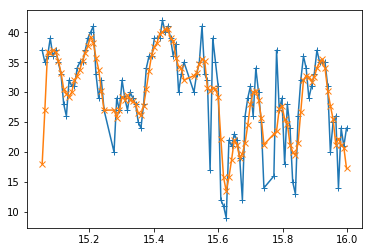

In [45]:
plt.figure()
plt.plot(f_liq['tmhrs'],f_liq['tau_rtm'],'-+')
plt.plot(f_liq['tmhrs'],smooth(f_liq['tau_rtm'],4,old=True),'-x')


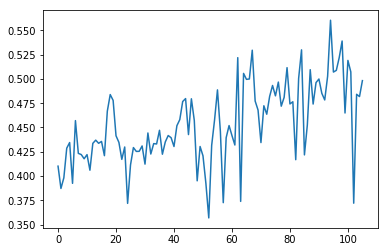

In [46]:
plt.figure()
plt.plot(f_liq['ki_rtm'])

In [48]:
f_liq['ref_err'].shape

(2, 106)

In [77]:
f = [f_liq,f_mix,f_ice]

In [86]:
def fo(gu,nn):

    gu['tau_rtm'][nn] = np.nan
    gu['ref_rtm'][nn] = np.nan
    gu['tau_err'][0,nn] = np.nan
    gu['ref_err'][0,nn] = np.nan
    gu['tau_err'][1,nn] = np.nan
    gu['ref_err'][1,nn] = np.nan
    gu['ki_rtm'][nn] = np.nan
    gu['wp_rtm'][nn] = np.nan
    return gu

In [91]:
rtr = []
for i,g in enumerate(f):
    ff = {}
    for k in g.keys(): ff[k] = np.array(g[k])
    ff['tau_rtm'] = smooth(ff['tau_rtm'],4,old=True)
    ff['ref_rtm'] = smooth(ff['ref_rtm'],4,old=True)
    tr = ff['tau_rtm']==0
    if any(tr): ff = fo(ff,tr)
    trm = ff['tau_rtm']>99.0
    if any(trm): ff = fo(ff,trm)
    rr = ff['ref_rtm']==0
    if any(rr): ff = fo(ff,rr)
    rrm = ff['ref_rtm']>99.0
    if any(rrm): ff = fo(ff,rrm)
    kr = ff['ki_rtm']>0.69
    if any(kr): ff = fo(ff,kr)
    rem = ff['ref_err'][0,:]>3.0
    if any(rem): ff['ref_err'][0,rem] = 3.0
    if i==0:
        wr = ff['wp_rtm']==1
        if any(wr): ff = fo(ff,wr)
    elif i==2:
        wr = ff['wp_rtm']==0
        if any(wr): ff = fo(ff,wr)
    rtr.append(ff)

/home/samuel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


In [93]:
rtr[0].keys()

['wp_err',
 'ref_err',
 'ki_rtm',
 'wp_rtm',
 'ref_rtm',
 'tau_rtm',
 'tau_err',
 'tmhrs']

### save liquid cloud

In [96]:
dict_fliq =  {'Start_UTC':{'data':rtr[0]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtr[0]['tau_rtm'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtr[0]['ref_rtm'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err_low':{'data':rtr[0]['tau_err'][0,:],'unit':'None',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[0]['tau_err'][1,:],'unit':'None',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[0]['ref_err'][0,:],'unit':'micrometer',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[0]['ref_err'][1,:],'unit':'micrometer',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[0]['wp_rtm'],'unit':'None',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[0]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [100]:
hdict_fliq = hdict
hdict_fliq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [104]:
wu.write_ict(hdict_fliq,dict_fliq,filepath=fp,
              data_id='SSFR_15params_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order)    

COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-15params-CLD_Boulder_20120525_R0.ict


### Save mix phase cloud

In [105]:
dict_fmix =  {'Start_UTC':{'data':rtr[1]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtr[1]['tau_rtm'],'unit':'None',
             'long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtr[1]['ref_rtm'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err_low':{'data':rtr[1]['tau_err'][0,:],'unit':'None',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[1]['tau_err'][1,:],'unit':'None',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[1]['ref_err'][0,:],'unit':'micrometer',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[1]['ref_err'][1,:],'unit':'micrometer',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[1]['wp_rtm'],'unit':'None',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[1]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [106]:
hdict_mix = hdict
hdict_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [109]:
wu.write_ict(hdict_mix,dict_fmix,filepath=fp,
              data_id='SSFR_15params_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order) 

COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-15params-CLD_Boulder_20120806_R0.ict


### Save ice cloud

In [111]:
dict_fice =  {'Start_UTC':{'data':rtr[2]['tmhrs']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtr[2]['tau_rtm'],'unit':'None',
             'long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtr[2]['ref_rtm'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err_low':{'data':rtr[2]['tau_err'][0,:],'unit':'None',
                     'long_description':'Lower value of retrieval uncertainty of Cloud Optical Depth'},
      'COD_err_up':{'data':rtr[2]['tau_err'][1,:],'unit':'None',
                    'long_description':'Upper value of retrieval uncertainty of Cloud Optical Depth'},
      'REF_err_low':{'data':rtr[2]['ref_err'][0,:],'unit':'micrometer',
                     'long_description':'Lower value of retrieval uncertainty of Cloud effective radius.'},
      'REF_err_up':{'data':rtr[2]['ref_err'][1,:],'unit':'micrometer',
                    'long_description':'Upper value of retrieval uncertainty of Cloud effective radius.'},
      'Phase':{'data':rtr[2]['wp_rtm'],'unit':'None',
               'long_description':'Thermodynamic phase, 0 for liquid cloud, 1 for ice cloud'},
      'Ki_square':{'data':rtr[2]['ki_rtm'],'unit':'None',
                   'long_description':'Ki square fit parameter. It is the remainder of the ki square fit, values higher than 0.69 are considered to be failed retrievals.'}}

In [110]:
hdict_ice = hdict
hdict_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [112]:
wu.write_ict(hdict_ice,dict_fice,filepath=fp,
              data_id='SSFR_15params_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order) 

COD
COD_err_low
COD_err_up
REF
REF_err_low
REF_err_up
Phase
Ki_square
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-15params-CLD_Boulder_20130110_R0.ict


## slope retrieval

In [114]:
sl_liq

{'eref': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'etau': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'ref': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'tau': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'tmhrs': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

In [115]:
sl = [sl_liq,sl_mix,sl_ice]

In [133]:
rsl = []
for i,g in enumerate(sl):
    fsl = {}
    tr = g['tau']!=0
    fsl['COD'] = g['tau'][tr]
    fsl['REF'] = g['ref'][tr]
    fsl['REF_ERR'] = g['eref'][tr]
    fsl['COD_ERR'] = g['etau'][tr]
    fsl['utc'] = g['tmhrs'][tr]
    rsl.append(fsl)

In [131]:
rsl[2]['utc']

array([17.519722, 17.528055, 17.536388, 17.544722, 17.553055, 17.561388,
       17.569723, 17.578056, 17.58639 , 17.594723, 17.603056, 17.61139 ,
       17.619722, 17.628056, 17.636389, 17.644722, 17.653055, 17.661388,
       17.669722, 17.678055, 17.686388, 17.694723, 17.703056, 17.71139 ,
       17.719723, 17.728056, 17.73639 , 17.744722, 17.775555, 17.78389 ,
       17.792223, 17.800556, 17.80889 , 17.817223, 17.825556, 17.833889,
       17.842222, 17.850555, 17.858889, 17.867222, 17.875555, 17.883888,
       17.892221, 17.900555, 17.90889 , 17.917223, 17.925556, 17.93389 ,
       17.942223, 17.950556, 17.958889, 17.967222, 17.975555, 17.983889,
       17.992222, 18.020277, 18.02861 , 18.036945, 18.045279, 18.053612,
       18.061945, 18.070278, 18.078611, 18.086945, 18.095278, 18.103611,
       18.111944, 18.120277, 18.12861 , 18.136944, 18.145277, 18.15361 ,
       18.161945, 18.170279, 18.178612, 18.186945, 18.195278, 18.203611,
       18.211945, 18.220278, 18.228611, 18.236944, 

### Save liquid cloud

In [132]:
hdict_sl = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'Boulder, Colorado, USA',
     'instrument_info':'Derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the cloud property retrieval method based on slope at 1600 nm from transmitted light measurements described by McBride et al., 2011, doi:10.5194/acp-11-7235-2011.',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in December, 2019.'
    }
order_sl = ['COD','COD_err','REF','REF_err']

In [134]:
dict_sl_liq =  {'Start_UTC':{'data':rsl[0]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rsl[0]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rsl[0]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rsl[0]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rsl[0]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [135]:
hdict_sl_liq = hdict_sl
hdict_sl_liq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [136]:
wu.write_ict(hdict_sl_liq,dict_sl_liq,filepath=fp,
              data_id='SSFR_slope_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order_sl)    

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-slope-CLD_Boulder_20120525_R0.ict


### Save mix-phase cloud

In [137]:
dict_sl_mix =  {'Start_UTC':{'data':rsl[1]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rsl[1]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rsl[1]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rsl[1]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rsl[1]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [138]:
hdict_sl_mix = hdict_sl
hdict_sl_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [139]:
wu.write_ict(hdict_sl_mix,dict_sl_mix,filepath=fp,
              data_id='SSFR_slope_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order_sl)    

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-slope-CLD_Boulder_20120806_R0.ict


### Save ice cloud

In [140]:
dict_sl_ice =  {'Start_UTC':{'data':rsl[2]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rsl[2]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rsl[2]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rsl[2]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rsl[2]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [141]:
hdict_sl_ice = hdict_sl
hdict_sl_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [142]:
wu.write_ict(hdict_sl_ice,dict_sl_ice,filepath=fp,
              data_id='SSFR_slope_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order_sl)    

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-slope-CLD_Boulder_20130110_R0.ict


## 2wvl retrieval


In [143]:
twv = [twv_liq,twv_mix,twv_ice]

In [144]:
twv_liq.keys()

['tau', 'etau', 'eref', 'ref', 'tmhrs']

In [146]:
rtw = []
for i,g in enumerate(twv):
    ftw = {}
    tr = g['tau']!=0
    ftw['COD'] = g['tau'][tr]
    ftw['REF'] = g['ref'][tr]
    ftw['REF_ERR'] = g['eref'][tr]
    ftw['COD_ERR'] = g['etau'][tr]
    ftw['utc'] = g['tmhrs'][tr]
    rtw.append(ftw)

In [148]:
rtw[0]['REF']

array([ 6.,  8.,  6.,  5.,  5.,  5.,  4.,  6.,  9.,  8.,  4.,  4.,  4.,
        4.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  6.,  5.,  7.,  4.,  3.,
        5.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  4.,  4.,  4.,  5.,  6.,  6.,  5.,  4.,  9.,
        6.,  4.,  4.,  3.,  5.,  5.,  3.,  3.,  5., 12., 12., 18.,  5.,
        6.,  6., 14.,  7.,  9.,  4.,  3.,  4.,  4.,  6.,  5.,  6., 10.,
       11.,  4.,  7.,  9., 11.,  6., 11.,  6.,  9.,  3.,  3.,  3.,  4.,
        4.,  4.,  4.,  4.,  5.,  4.,  4.,  5.,  7.,  8.,  7., 10.,  8.,
        8.,  5.], dtype=float32)

In [145]:
hdict_twv = {'PI':'Samuel LeBlanc',
     'Institution':'NASA Ames Research Center',
     'Instrument':'Solar Spectral Flux Radiometer - 3 (SSFR3)',
     'campaign':'University of Colorado Skywatch Observatory',
     'special_comments':'',
     'PI_contact':'Samuel.leblanc@nasa.gov',
     'platform':'Roof top University of Colorado',
     'location':'Boulder, Colorado, USA',
     'instrument_info':'Derived product from SSFR with zenith narrow field of view radiance light collector',
     'data_info':'Using the 2 wavelength cloud property retrieval method from transmitted light measurements.',
     'uncertainty':'See included variables.',
     'DM_contact':'Samuel LeBlanc, samuel.leblanc@nasa.gov',
     'project_info':'N/A',
     'stipulations':'',
     'rev_comments':'R0: Data from LeBlanc et al., 2015 publication, released to A. Kohkanovsky in December, 2019.'
    }
order_twv = ['COD','COD_err','REF','REF_err']

### Save liquid cloud

In [149]:
dict_tw_liq =  {'Start_UTC':{'data':rtw[0]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtw[0]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtw[0]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rtw[0]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rtw[0]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [151]:
hdict_tw_liq = hdict_twv
hdict_tw_liq['special_comments'] = 'Liquid cloud case from LeBlanc et al., 2015'

In [153]:
wu.write_ict(hdict_tw_liq,dict_tw_liq,filepath=fp,
              data_id='SSFR_2wvl_CLD',loc_id='Boulder',date=days[0],rev='R0',order=order_twv)  

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-2wvl-CLD_Boulder_20120525_R0.ict


### Save mix phase cloud

In [154]:
dict_tw_mix =  {'Start_UTC':{'data':rtw[1]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtw[1]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtw[1]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rtw[1]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rtw[1]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [155]:
hdict_tw_mix = hdict_twv
hdict_tw_mix['special_comments'] = 'Mixed-phase cloud case from LeBlanc et al., 2015'

In [156]:
wu.write_ict(hdict_tw_mix,dict_tw_mix,filepath=fp,
              data_id='SSFR_2wvl_CLD',loc_id='Boulder',date=days[1],rev='R0',order=order_twv) 

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-2wvl-CLD_Boulder_20120806_R0.ict


### Save ice cloud

In [157]:
dict_tw_ice =  {'Start_UTC':{'data':rtw[2]['utc']*3600.0,'unit':'seconds from midnight UTC',
                           'long_description':'time keeping, based on UTC midnight'},
      'COD':{'data':rtw[2]['COD'],'unit':'None','long_description':'Cloud Optical Depth of overlying cloud'},
      'REF':{'data':rtw[2]['REF'],'unit':'micrometer',
             'long_description':'Cloud drop effective radius for liquid clouds'},
      'COD_err':{'data':rtw[2]['COD_ERR'],'unit':'None',
                     'long_description':'Retrieval uncertainty of Cloud Optical Depth'},
      'REF_err':{'data':rtw[2]['REF_ERR'],'unit':'micrometer',
                    'long_description':'Retrieval uncertainty of Cloud effective radius.'}}

In [158]:
hdict_tw_ice = hdict_twv
hdict_tw_ice['special_comments'] = 'Ice cloud case from LeBlanc et al., 2015'

In [159]:
wu.write_ict(hdict_tw_ice,dict_tw_ice,filepath=fp,
              data_id='SSFR_2wvl_CLD',loc_id='Boulder',date=days[2],rev='R0',order=order_twv) 

COD
COD_err
REF
REF_err
File writing successful to: /mnt/c/Users/lebla/Research/SSFR3/SSFR-2wvl-CLD_Boulder_20130110_R0.ict


## Spectra

# Write out the results